In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

 # Load the pendigits dataset

In [81]:
train_df = pd.read_csv(r'C:\Users\hp\Desktop\مبادره مشاريع\data set\pendigits-tra.csv',header=None)
test_df = pd.read_csv(r'C:\Users\hp\Desktop\مبادره مشاريع\data set\pendigits-tes.csv',header=None)
train_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


Check the balancing of the dataset

In [82]:
train_df[16].value_counts()

16
2    780
4    780
0    780
1    779
7    778
6    720
5    720
8    719
9    719
3    719
Name: count, dtype: int64

In [83]:
def plot_confusion(matrix,title,xlabel,ylabel):
    plt.figure(figsize=(10,10));
    sns.heatmap(matrix, annot=True,fmt='g');
    plt.title(title,fontsize=14);
    plt.xlabel(xlabel,fontsize=12);
    plt.ylabel(ylabel,fontsize=12);

Decision Tree

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       363
           1       0.85      0.89      0.87       364
           2       0.88      0.96      0.92       364
           3       0.87      0.93      0.90       336
           4       0.92      0.97      0.95       364
           5       0.96      0.86      0.91       335
           6       0.98      0.94      0.96       336
           7       0.92      0.85      0.88       364
           8       0.92      0.94      0.93       336
           9       0.95      0.93      0.94       336

    accuracy                           0.92      3498
   macro avg       0.92      0.92      0.92      3498
weighted avg       0.92      0.92      0.92      3498



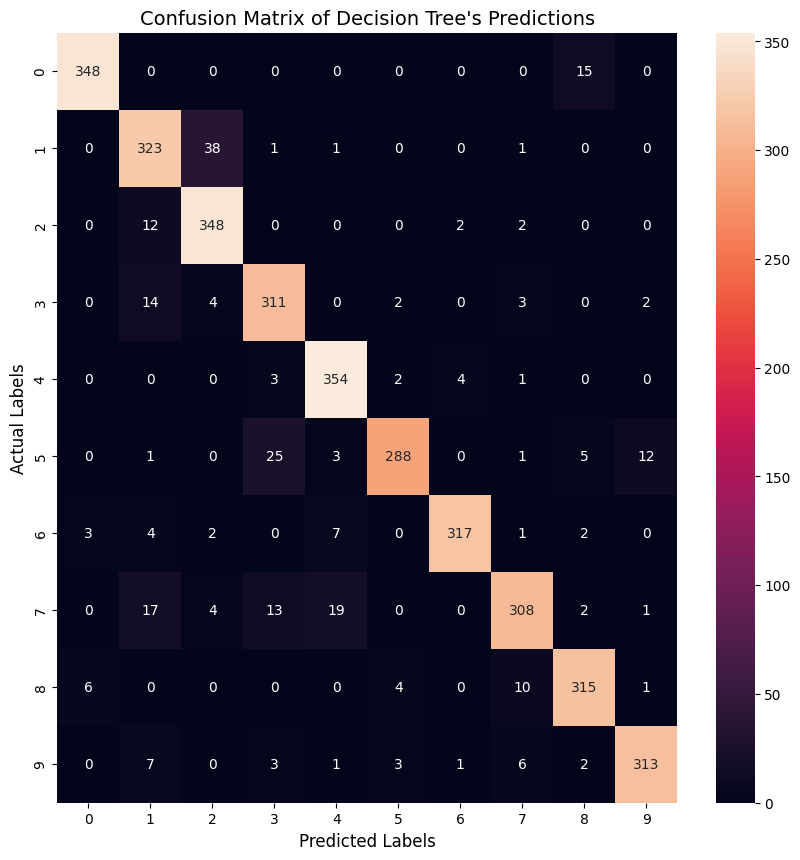

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
ctree = DecisionTreeClassifier()
ctree.fit(train_df.iloc[:,:-1],train_df.iloc[:,-1])
y_pred = ctree.predict(test_df.iloc[:,:-1])
print(classification_report(test_df.iloc[:,-1],y_pred))
conf_matrix = pd.DataFrame(confusion_matrix(test_df.iloc[:,-1],y_pred))
plot_confusion(matrix=conf_matrix,title="Confusion Matrix of Decision Tree's Predictions",xlabel="Predicted Labels",ylabel="Actual Labels")

Bagging strategy

In [106]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ensure train_df and test_df are already defined
def bag_clf(train_df=None, test_df=None, base_estimator=DecisionTreeClassifier(), n_estimators=10):
    if train_df is None or test_df is None:
        raise ValueError("train_df and test_df cannot be None")
    
    # Initialize BaggingClassifier with the correct parameter name
    model_bag = BaggingClassifier(estimator=base_estimator, n_estimators=n_estimators, bootstrap=True)
    
    # Fit the model
    model_bag.fit(train_df.iloc[:, :-1], train_df.iloc[:, -1])
    
    # Predict on the test set
    model_pred = model_bag.predict(test_df.iloc[:, :-1])
    
    # Generate the classification report and confusion matrix
    class_report = classification_report(test_df.iloc[:, -1], model_pred)
    conf_matrix = pd.DataFrame(confusion_matrix(test_df.iloc[:, -1], model_pred))
    
    # Calculate the accuracy
    accuracy = accuracy_score(test_df.iloc[:, -1], model_pred)
    
    return accuracy, class_report, conf_matrix

# Example usage with different models
models = {"SVM": SVC(), "Decision Tree": DecisionTreeClassifier()}
for model_name, clf in models.items():
    accuracy, class_report, conf_matrix = bag_clf(train_df=train_df, test_df=test_df, base_estimator=clf)
    print(f"Using {model_name} as a base estimator")
    print("-" * 40)
    print(class_report)
    print("Confusion Matrix:\n", conf_matrix)
    print(f"Accuracy: {accuracy:.4f}\n")


Using SVM as a base estimator
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       363
           1       0.95      0.96      0.95       364
           2       0.96      0.99      0.98       364
           3       0.99      0.99      0.99       336
           4       1.00      0.99      0.99       364
           5       0.99      0.98      0.98       335
           6       1.00      1.00      1.00       336
           7       0.99      0.95      0.97       364
           8       0.97      1.00      0.98       336
           9       0.98      0.98      0.98       336

    accuracy                           0.98      3498
   macro avg       0.98      0.98      0.98      3498
weighted avg       0.98      0.98      0.98      3498

Confusion Matrix:
      0    1    2    3    4    5    6    7    8    9
0  354    0    0    0    0    0    0    0    9    0
1    0  350   13    0    1    0    0    0    0 

 ## Display Confusion Matrix¶

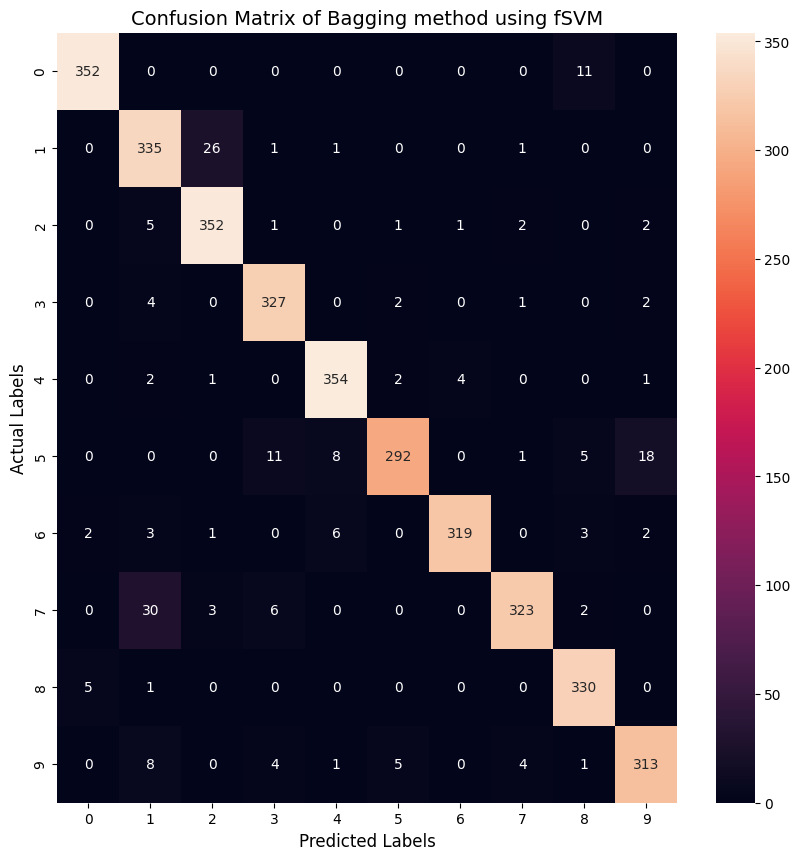

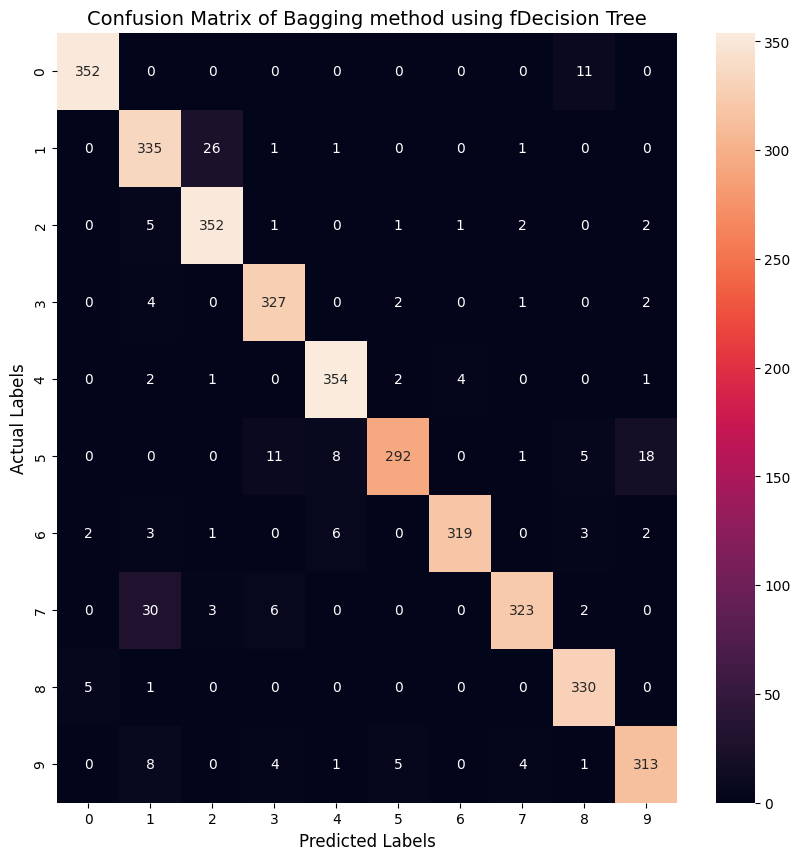

In [107]:
for model_name,clf in models.items():
        plot_confusion(matrix=conf_matrix,
                       title=f"Confusion Matrix of Bagging method using f{model_name}",
                       xlabel="Predicted Labels",ylabel="Actual Labels")

ٍSelect the best number of estimators using the Decision Tree base estimator.

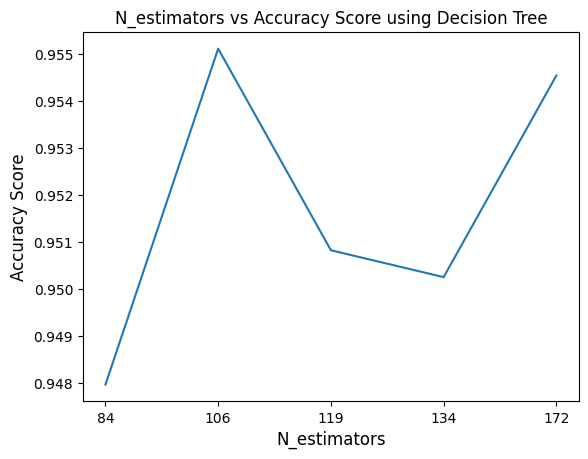

In [109]:
np.random.seed(0)

# Randomly select 5 unique values for n_estimators between 10 and 200
n_estimators = np.random.choice(range(10, 201), size=5, replace=False)
n_estimators.sort()

# Initialize a dictionary to store accuracy scores for each number of estimators
score_dict = dict()

# Evaluate bagging classifier for different n_estimators values
for num in n_estimators:
    accuracy, _, _ = bag_clf(train_df=train_df, test_df=test_df, n_estimators=num)
    score_dict[str(num)] = accuracy

# Plot the results
sns.lineplot(x=list(score_dict.keys()), y=list(score_dict.values()))
plt.xlabel("N_estimators", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("N_estimators vs Accuracy Score using Decision Tree")
plt.show()

Using n_estimators = 106
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       363
           1       0.89      0.92      0.91       364
           2       0.93      0.98      0.95       364
           3       0.95      0.98      0.96       336
           4       0.96      0.98      0.97       364
           5       0.97      0.90      0.93       335
           6       0.98      0.97      0.98       336
           7       0.98      0.90      0.94       364
           8       0.92      0.98      0.95       336
           9       0.96      0.96      0.96       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498



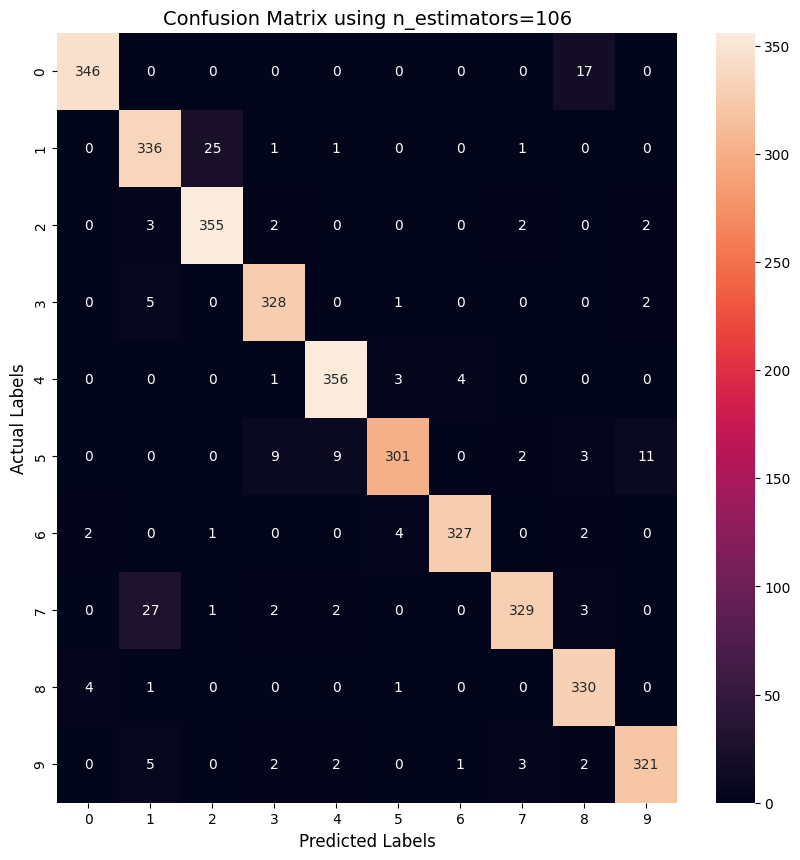

In [111]:
# Assuming train_df and test_df are your datasets
accuracy, class_report, conf_matrix = bag_clf(train_df=train_df, test_df=test_df, base_estimator=DecisionTreeClassifier(), n_estimators=106)
print(f"Using n_estimators = {106}")
print("-"*30)
print(class_report)
plot_confusion(matrix=conf_matrix, title=f"Confusion Matrix using n_estimators=106", xlabel="Predicted Labels", ylabel="Actual Labels")


GradientBoosting classifier¶

In [112]:
def gbdc_clf(train_df = train_df, test_df = test_df, n_estimators=100,learning_rate=0.1):
    gdbc = GradientBoostingClassifier(n_estimators=n_estimators,learning_rate=learning_rate)
    gdbc.fit(train_df.iloc[:,:-1],train_df.iloc[:,-1])
    gdbc_pred = gdbc.predict(test_df.iloc[:,:-1])
    accuracy = accuracy_score(test_df.iloc[:,-1],gdbc_pred)
    class_report= classification_report(test_df.iloc[:,-1],gdbc_pred)
    conf_matrix = pd.DataFrame(confusion_matrix(test_df.iloc[:,-1],gdbc_pred))
    accuracy = accuracy_score(test_df.iloc[:,-1],gdbc_pred)
    return accuracy, class_report, conf_matrix

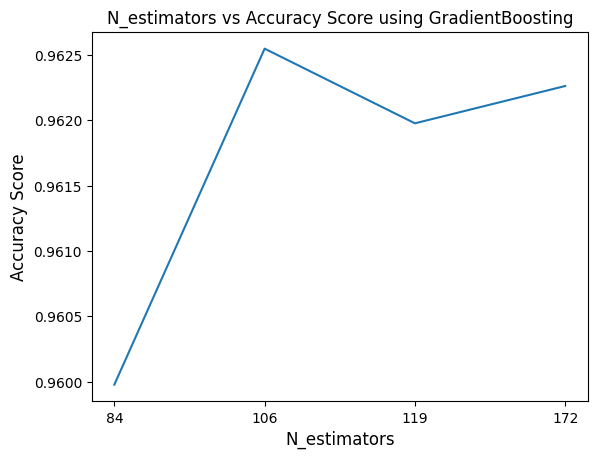

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(0)
n_estimators = np.random.choice(range(10,201),size=4,replace=False)
n_estimators.sort()
gdbc_score_dict = dict()
for num in n_estimators:
    accuracy, class_report, conf_matrix = gbdc_clf(n_estimators=num)
    gdbc_score_dict[str(num)] = accuracy
sns.lineplot(x=gdbc_score_dict.keys(),y=gdbc_score_dict.values());
plt.xlabel("N_estimators",fontsize=12);
plt.ylabel("Accuracy Score",fontsize=12);
plt.title("N_estimators vs Accuracy Score using GradientBoosting");

In [114]:
best_n_est = int([key for key,val in gdbc_score_dict.items() if val == max(gdbc_score_dict.values())][0])
best_n_est

106

In [115]:
accuracy, class_report, conf_matrix = gbdc_clf(n_estimators=best_n_est)
print(f"Using n_estimators = {best_n_est}")
print("-"*30)
print(class_report)

Using n_estimators = 106
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.92      0.93      0.92       364
           2       0.93      0.99      0.96       364
           3       0.97      0.99      0.97       336
           4       1.00      1.00      1.00       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.91      0.96      0.94       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498



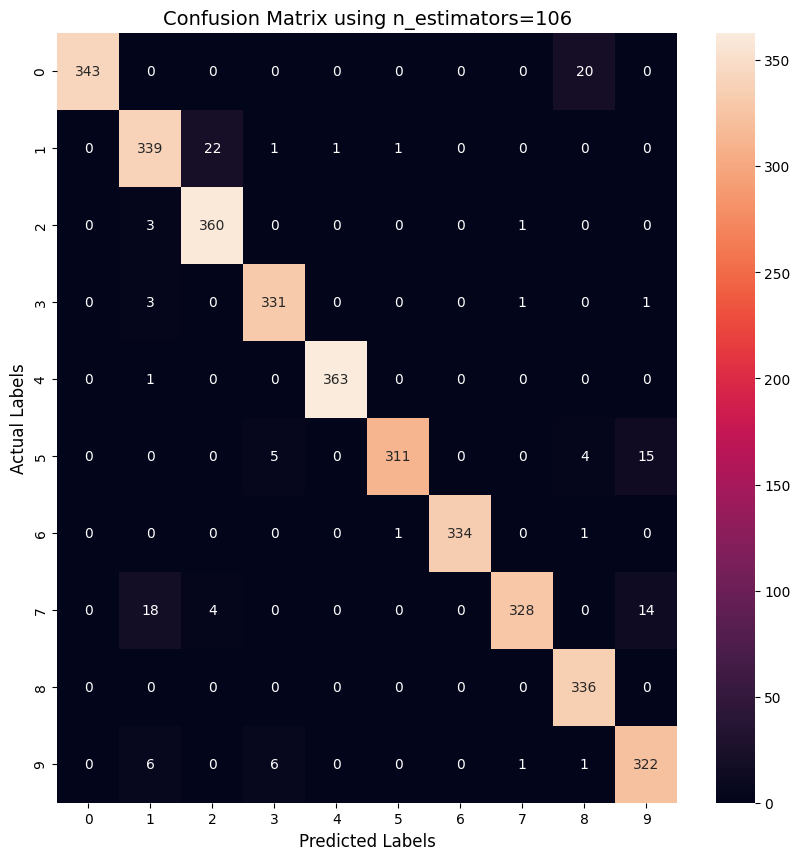

In [116]:
plot_confusion(matrix=conf_matrix,title=f"Confusion Matrix using n_estimators=106",xlabel="Predicted Labels",ylabel="Actual Labels")

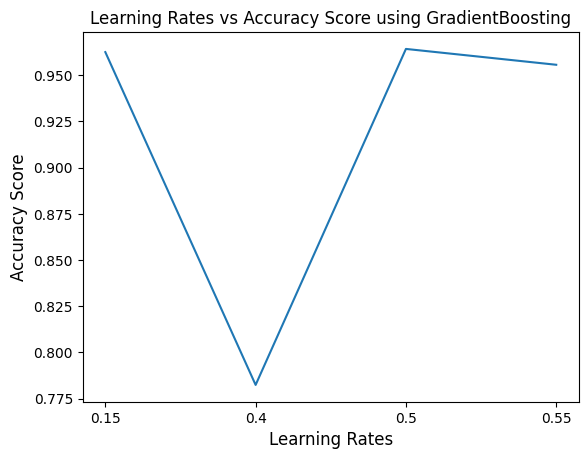

In [117]:
np.random.seed(0)
learning_rates = np.random.choice(np.arange(0.1,0.95,0.05),size=4,replace=False)
learning_rates = np.around(learning_rates,2)
learning_rates.sort()
gdbc_score_dict = dict()
for num in learning_rates:
    accuracy, class_report, conf_matrix = gbdc_clf(n_estimators=best_n_est,learning_rate=num)
    gdbc_score_dict[str(num)] = accuracy
sns.lineplot(x=gdbc_score_dict.keys(),y=gdbc_score_dict.values());
plt.xlabel("Learning Rates",fontsize=12);
plt.ylabel("Accuracy Score",fontsize=12);
plt.title("Learning Rates vs Accuracy Score using GradientBoosting");

Train the model with the best learning rate¶

In [118]:
best_learn_rate = float([key for key,val in gdbc_score_dict.items() if val == max(gdbc_score_dict.values())][0])
best_learn_rate

0.5

Using learning rate=0.5
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.89      0.96      0.92       364
           2       0.96      0.99      0.98       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.91      0.95       335
           6       1.00      1.00      1.00       336
           7       0.99      0.89      0.94       364
           8       0.93      1.00      0.96       336
           9       0.94      0.97      0.95       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498



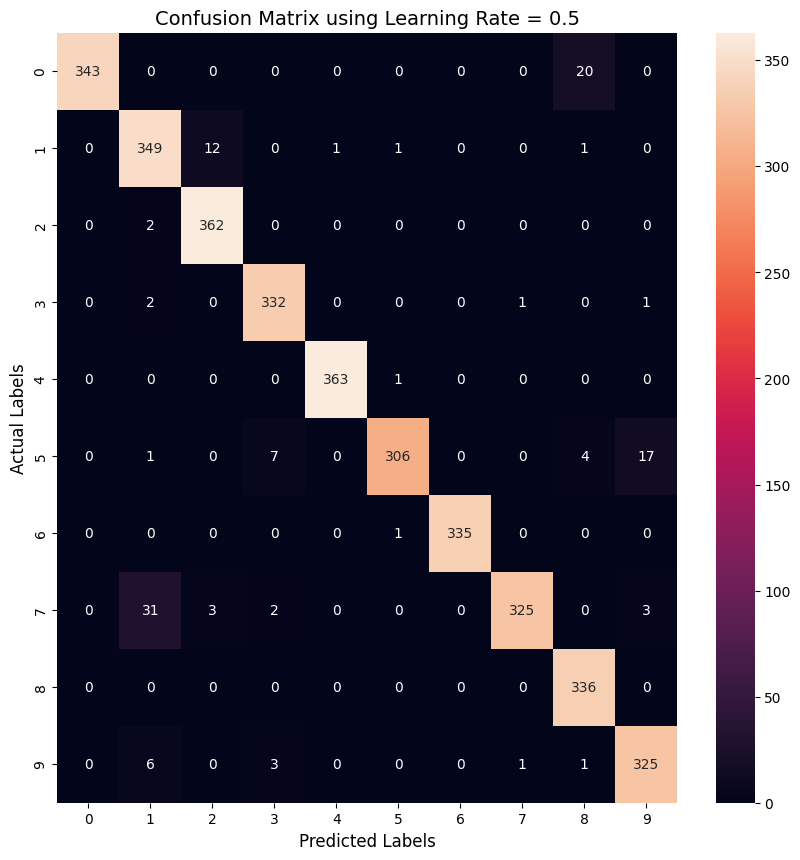

In [119]:
accuracy, class_report, conf_matrix = gbdc_clf(learning_rate=best_learn_rate)
print(f"Using learning rate={best_learn_rate}")
print("-"*30)
print(class_report)
plot_confusion(matrix=conf_matrix,title=f"Confusion Matrix using Learning Rate = 0.5",xlabel="Predicted Labels",ylabel="Actual Labels")

Accuracy and Confusion matrix for both best parameters¶

Using learning rate=0.5 and n_estimators=106
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.89      0.96      0.92       364
           2       0.96      0.99      0.98       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.90      0.95       335
           6       1.00      1.00      1.00       336
           7       0.99      0.89      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.97      0.95       336

    accuracy                           0.96      3498
   macro avg       0.97      0.96      0.96      3498
weighted avg       0.97      0.96      0.96      3498



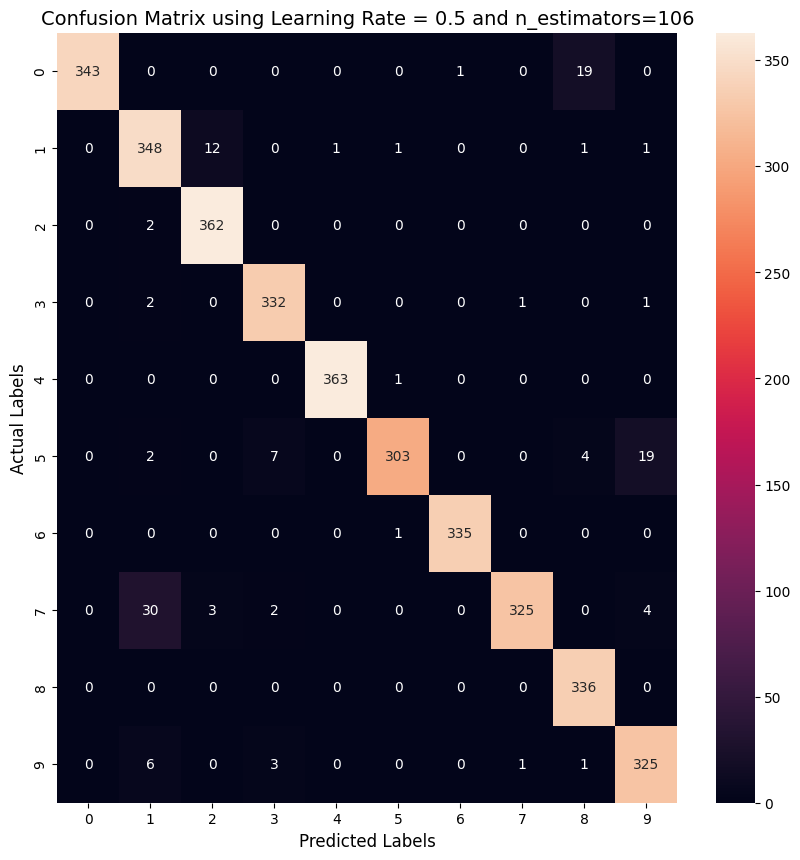

In [120]:
accuracy, class_report, conf_matrix = gbdc_clf(n_estimators=best_n_est,learning_rate=best_learn_rate)
print(f"Using learning rate=0.5 and n_estimators=106")
print("-"*50)
print(class_report)
plot_confusion(matrix=conf_matrix,title=f"Confusion Matrix using Learning Rate = 0.5 and n_estimators=106",xlabel="Predicted Labels",ylabel="Actual Labels")

## XGBoost classifier

Using n_estimators = 106
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       363
           1       0.89      0.92      0.91       364
           2       0.93      0.98      0.95       364
           3       0.95      0.98      0.96       336
           4       0.96      0.98      0.97       364
           5       0.97      0.90      0.93       335
           6       0.98      0.97      0.98       336
           7       0.98      0.90      0.94       364
           8       0.92      0.98      0.95       336
           9       0.96      0.96      0.96       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498



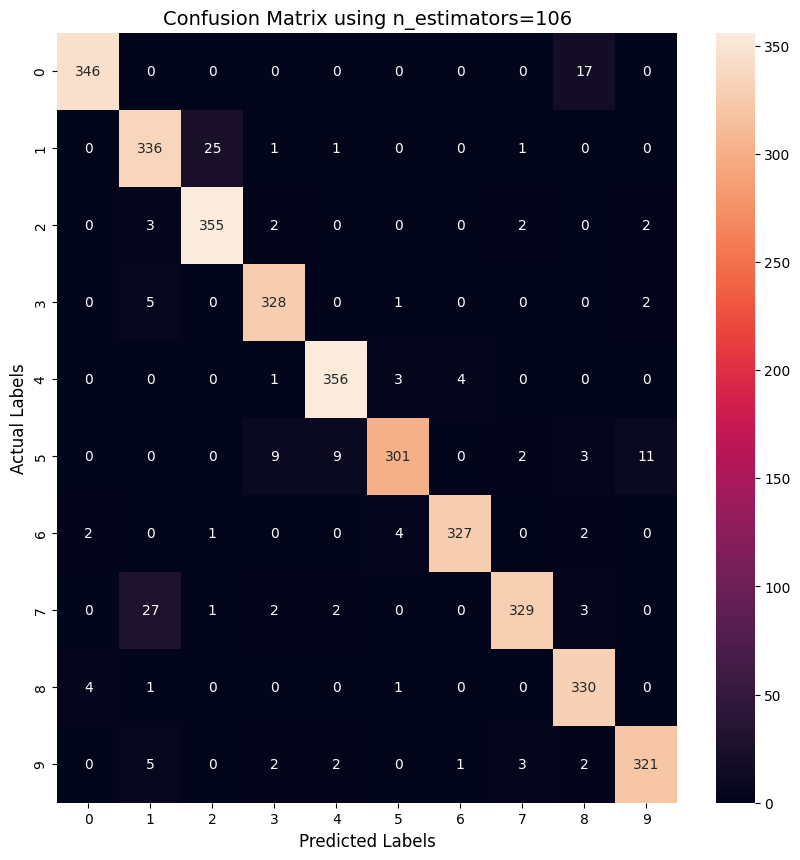

In [ ]:
# Assuming train_df and test_df are your datasets
accuracy, class_report, conf_matrix = bag_clf(train_df=train_df, test_df=test_df, base_estimator=DecisionTreeClassifier(), n_estimators=106)
print(f"Using n_estimators = {106}")
print("-"*30)
print(class_report)
plot_confusion(matrix=conf_matrix, title=f"Confusion Matrix using n_estimators=106", xlabel="Predicted Labels", ylabel="Actual Labels")


Using n_estimators = 106
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       363
           1       0.89      0.92      0.91       364
           2       0.93      0.98      0.95       364
           3       0.95      0.98      0.96       336
           4       0.96      0.98      0.97       364
           5       0.97      0.90      0.93       335
           6       0.98      0.97      0.98       336
           7       0.98      0.90      0.94       364
           8       0.92      0.98      0.95       336
           9       0.96      0.96      0.96       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498



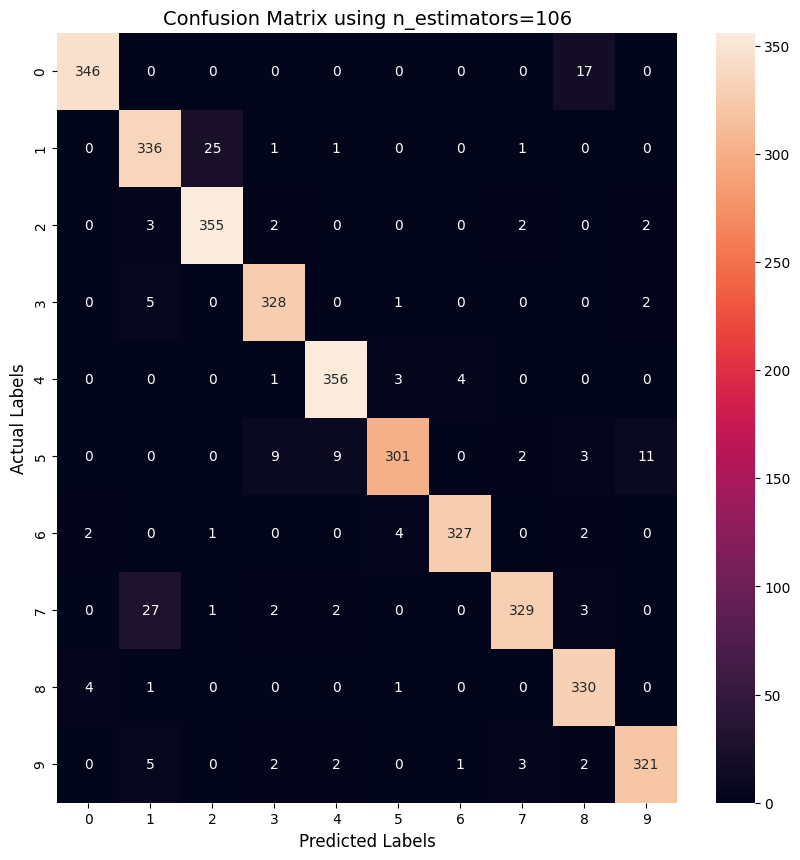

In [ ]:
# Assuming train_df and test_df are your datasets
accuracy, class_report, conf_matrix = bag_clf(train_df=train_df, test_df=test_df, base_estimator=DecisionTreeClassifier(), n_estimators=106)
print(f"Using n_estimators = {106}")
print("-"*30)
print(class_report)
plot_confusion(matrix=conf_matrix, title=f"Confusion Matrix using n_estimators=106", xlabel="Predicted Labels", ylabel="Actual Labels")
